In [66]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------
# Função para gerar conjunto de Julia
# --------------------------

# c: parâmetro complexo fixo que define qual conjunto de Julia será gerado
# bounds: intervalo no plano complexo a ser plotado → (x_min, x_max, y_min, y_max)
# max_iter: número máximo de iterações do mapa z ↦ z² + c
# escape_radius: se |z| ultrapassar esse valor, o ponto "escapa"



def julia_set(c, bounds=(-1.5, 1.5, -1.5, 1.5), resolution=1000, max_iter=300, escape_radius=2):  #resolution:  define a quantidade de pontos por eixo (horizontal e vertical) 
                                                                                                  #             na malha que representa o plano complexo.
    x_min, x_max, y_min, y_max = bounds
    x = np.linspace(x_min, x_max, resolution)   # [np.linspace] gera um vetor com números igualmente espaçados dentro de um intervalo.
    y = np.linspace(y_min, y_max, resolution)
    X, Y = np.meshgrid(x, y)    # [np.meshgrid] pega dois vetores 1D (um para o eixo x e um para o y) e cria uma grade 2D de coordenadas, 
    
                              #            combinando cada valor de x com cada valor de y.
    Z = X + 1j * Y
    img = np.zeros(Z.shape, dtype=int)   # cria um array preenchido com zeros.

    for i in range(max_iter):
        Z = Z**2 + c
        mask = (np.abs(Z) < escape_radius)   # np.abs(Z) calcula o módulo (ou valor absoluto) de cada número complexo em Z.
        img += mask             # O Python converte automaticamente:  True → 1  & False → 0  Então, cada posição da matriz img é incrementada em 1 
                                #                                     se o ponto ainda não escapou naquela iteração.

    return x, y, img            #                                     Pontos que escapam rapidamente vão somar poucos  valores baixos em [img]
                                #                                     Pontos que nunca escapam (pertencem ao conjunto) terão valores altos em img (até max_iter)



In [64]:
# --------------------------
# Parâmetros do plano Mandelbrot
# --------------------------
xmin, xmax = -2, 1
ymin, ymax = -1.5, 1.5
res = 1000
max_iter = 200

x = np.linspace(xmin, xmax, res)
y = np.linspace(ymin, ymax, res)
X, Y = np.meshgrid(x, y)   # Cria a malha bidimensional no plano complexo
C = X + 1j * Y # Constrói os pontos complexos Z = x + i y
Z = np.zeros_like(C)
div_time = np.zeros(C.shape, dtype=int)


In [5]:
# --------------------------
# Cálculo de Mandelbrot
# --------------------------
for i in range(max_iter):
    Z = Z**2 + C
    diverge = np.abs(Z) > 2
    div_now = diverge & (div_time == 0)
    div_time[div_now] = i
    Z[diverge] = 2




In [68]:
# --------------------------
# Valores de c (um dentro e um fora de M)
# --------------------------
c_dentro = -0.1 + 0.65j
c_fora = 0.4 + 0.6j

x1, y1, img1 = julia_set(c_dentro)
x2, y2, img2 = julia_set(c_fora)


# Inicializa a imagem com zeros (vai contar quantas vezes o ponto ainda não escapou)





C:\Users\55919\AppData\Local\Temp\ipykernel_13876\2186617048.py:27: RuntimeWarning: overflow encountered in square
  Z = Z**2 + c
C:\Users\55919\AppData\Local\Temp\ipykernel_13876\2186617048.py:27: RuntimeWarning: invalid value encountered in square
  Z = Z**2 + c


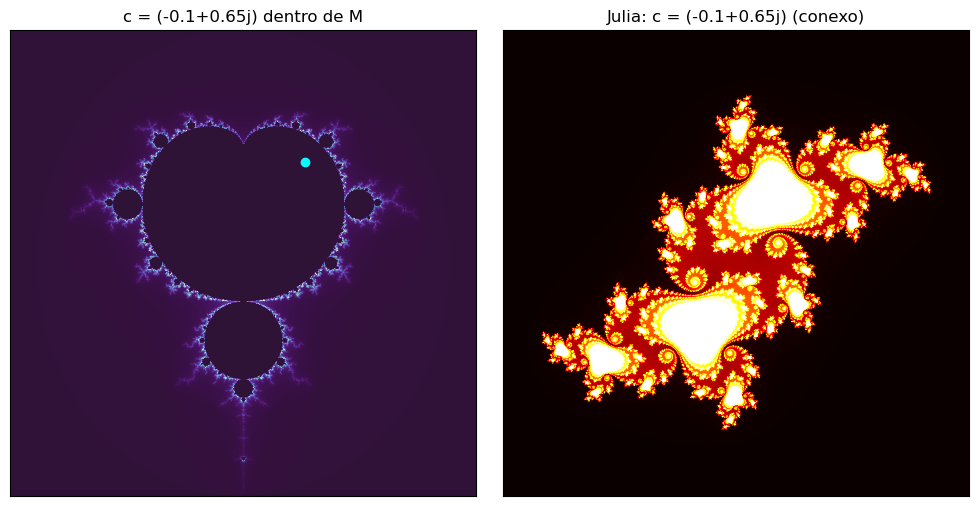

In [14]:

# Criando dois plots separados: um para c dentro de Mandelbrot e outro para c fora

fig1, axs1 = plt.subplots(1, 2, figsize=(10, 5))

# Plot 1: c dentro do conjunto de Mandelbrot
axs1[0].imshow(div_time.T, extent=[xmin, xmax, ymin, ymax], cmap='twilight_shifted', origin='lower')
axs1[0].scatter([c_dentro.real], [c_dentro.imag], color='cyan')
axs1[0].set_title(f"c = {c_dentro} dentro de M")
axs1[0].set_xticks([])
axs1[0].set_yticks([])

axs1[1].imshow(img1, extent=[x1[0], x1[-1], y1[0], y1[-1]], cmap='hot')
axs1[1].set_title(f"Julia: c = {c_dentro} (conexo)")
axs1[1].set_xticks([])
axs1[1].set_yticks([])

plt.tight_layout()
plt.show()


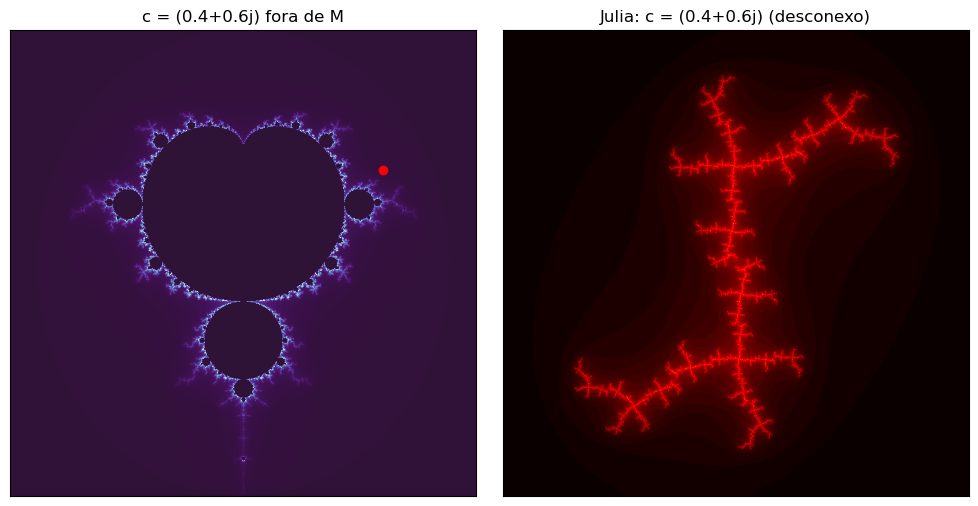

In [16]:
# Plot 2: c fora do conjunto de Mandelbrot
fig2, axs2 = plt.subplots(1, 2, figsize=(10, 5))

axs2[0].imshow(div_time.T, extent=[xmin, xmax, ymin, ymax], cmap='twilight_shifted', origin='lower')
axs2[0].scatter([c_fora.real], [c_fora.imag], color='red')
axs2[0].set_title(f"c = {c_fora} fora de M")
axs2[0].set_xticks([])
axs2[0].set_yticks([])

axs2[1].imshow(img2, extent=[x2[0], x2[-1], y2[0], y2[-1]], cmap='hot')
axs2[1].set_title(f"Julia: c = {c_fora} (desconexo)")
axs2[1].set_xticks([])
axs2[1].set_yticks([])

plt.tight_layout()
plt.show()

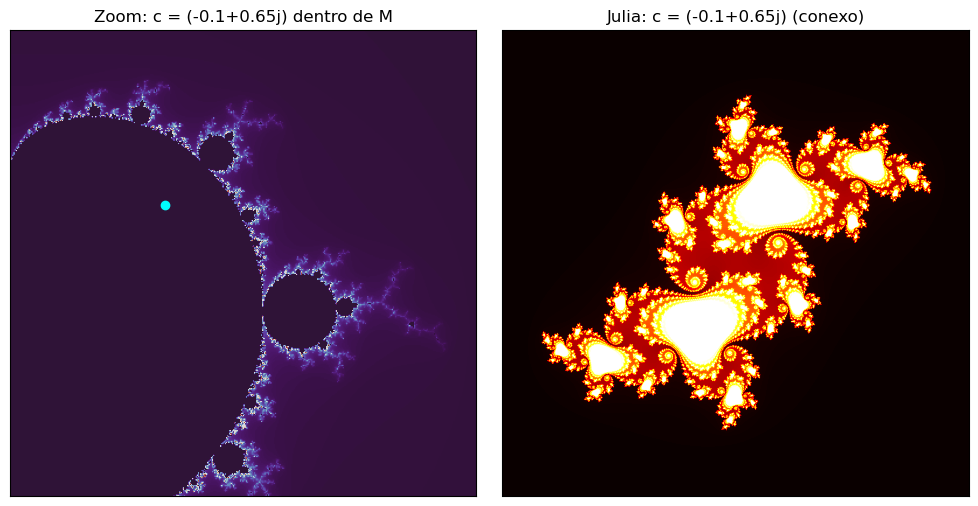

In [20]:
# Vamos aproximar o zoom da imagem do conjunto de Mandelbrot em torno dos valores de c
zoom_xmin, zoom_xmax = -0.5, 0.7
zoom_ymin, zoom_ymax = -0.1, 1.1

fig1, axs1 = plt.subplots(1, 2, figsize=(10, 5))

# Mandelbrot com c_dentro (zoom)
axs1[0].imshow(div_time.T, extent=[xmin, xmax, ymin, ymax], cmap='twilight_shifted', origin='lower')
axs1[0].scatter([c_dentro.real], [c_dentro.imag], color='cyan')
axs1[0].set_xlim(zoom_xmin, zoom_xmax)
axs1[0].set_ylim(zoom_ymin, zoom_ymax)
axs1[0].set_title(f"Zoom: c = {c_dentro} dentro de M")
axs1[0].set_xticks([])
axs1[0].set_yticks([])
# Julia set conexo
axs1[1].imshow(img1, extent=[x1[0], x1[-1], y1[0], y1[-1]], cmap='hot')
axs1[1].set_title(f"Julia: c = {c_dentro} (conexo)")
axs1[1].set_xticks([])
axs1[1].set_yticks([])

plt.tight_layout()
plt.show()


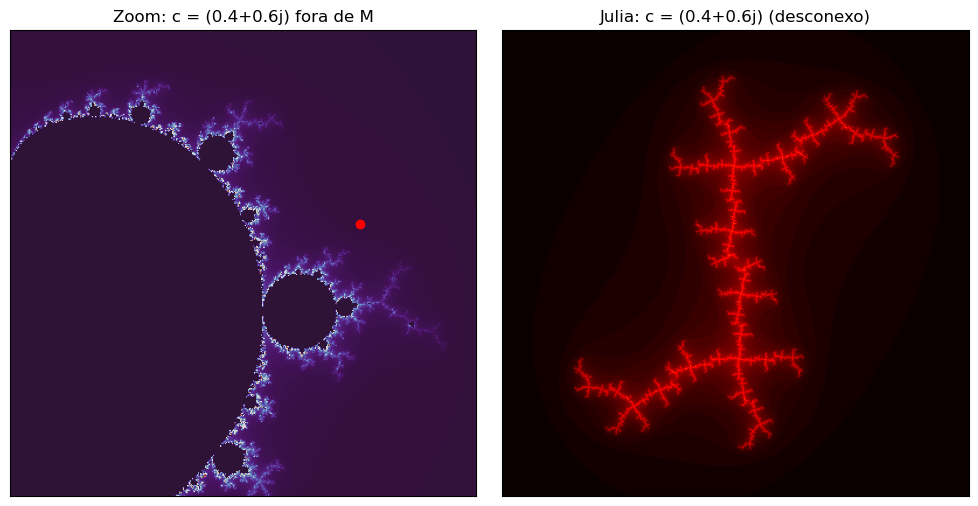

In [26]:
# Segundo par: c fora de M
fig2, axs2 = plt.subplots(1, 2, figsize=(10, 5))

# Mandelbrot com c_fora (zoom)
axs2[0].imshow(div_time.T, extent=[xmin, xmax, ymin, ymax], cmap='twilight_shifted', origin='lower')
axs2[0].scatter([c_fora.real], [c_fora.imag], color='red')
axs2[0].set_xlim(zoom_xmin, zoom_xmax)
axs2[0].set_ylim(zoom_ymin, zoom_ymax)
axs2[0].set_title(f"Zoom: c = {c_fora} fora de M")
axs2[0].set_xticks([])
axs2[0].set_yticks([])


# Julia set desconexo
axs2[1].imshow(img2, extent=[x2[0], x2[-1], y2[0], y2[-1]], cmap='hot')
axs2[1].set_title(f"Julia: c = {c_fora} (desconexo)")
axs2[1].set_xticks([])
axs2[1].set_yticks([])
plt.tight_layout()
plt.show()